In [1]:
"""
OBJETIVO : Visualizar un dato de precipitacion en el mapa
NOTA: Solo se puede graficar los canales infrarojos (C07 +)
            
"""
Autor='Diego Paredes'

In [2]:
# Graficar imagenes
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#from cartopy.feature import NaturalEarthFeature
#import cartopy.feature as cf
import plotly.express as px

# Manejo de imagenes
import pandas as pd
import GOES
import numpy as np
from netCDF4 import Dataset, num2date

In [3]:
"""
DEFINIMOS EL PATH DEL PROYECTO 
"""
with open('../../path_base.txt') as f:
    path_base = f.read()
path_base

'C:/Users/Shounen/Desktop/Ciclo XI/Tesis 2/FinalTesis/Tesis2-DiegoParedes'

In [4]:
"""
Variables generales
"""
path_imagenes = 'F:/GOES/'          

#Variables generales
products = ['C07','C08','C13']
times   = ['10','20','30','40','50','00']

## FUnciones

In [5]:
# Grafica la imagen satelital usando longitudes, latitudes, y los valores CMI. 
# Si se le entrega un punto (posLon,posLat), agregara un punto rojo
def dibujarMapa(lons,lats,field,mersh=0,point=[]):    
    if mersh:
        lons, lats = np.meshgrid(lons, lats)  
    else:
        field = field
    
    # Realiza el grafico  
    fig = plt.figure('ABI', figsize=(4,4), dpi=150)
    ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
    img = ax.pcolormesh(lons, lats, field, cmap=plt.cm.Greys, transform=ccrs.PlateCarree())
    #img = ax.pcolormesh(lons, lats, field, vmin=200, vmax=300, transform=ccrs.PlateCarree())                
    plt.colorbar(img) 
    
    #if point:             
    #    plt.plot(lons[point[0]],lats[point[1]],'ro')        
        
    plt.show()
    #plt.savefig('CANAL_EJEMPLOS.png')
    return 

In [6]:
#Como input (imagenFile) recibe un string que es el nombre del archivo de una imagen satelital (.nc),
# devuelve la matriz que representa esta imagen numpy.array(1200,950)
# Si imprimir = 1, va dibujar la imagen satelital
# En el parametro p, se puede inddicar un punto.
# P tiene 3 valores (punto + margen), el margen servirá para recortar la imagen antes de dibujar.
def getMapFile(imagenFile,mersh=0,imprimir=0,p=[]):
    try:
        ds = Dataset(imagenFile)      
    except:
        print("No se pudo leer los archivos de imagen")
        print(imagenFile)
        return -1,-1

    # convierte el formato de la variable de Int16 a Float32 y guarda el resultado
    field = ds.variables['CMI'][:].data.astype(np.int16)/100.0

    # obtiene las coordenadas de los pixeles
    lons = ds.variables['longitude'][:].data
    lats = ds.variables['latitude'][:].data
    date = num2date(ds.variables['time'][:], ds.variables['time'].units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)
    if p:
        margen = int(p[2])
    if imprimir:    
        dibujarMapa(lons,lats,field,mersh,point=p)
        if p:
            dibujarMapa(lons[p[0]-margen:p[0]+margen],
                        lats[p[1]-margen:p[1]+margen],
                        field[p[1]-margen:p[1]+margen,p[0]-margen:p[0]+margen],mersh,point=[])
        
    # Solo devuele la parte cortada  
    if p:
        return lons[p[0]-margen:p[0]+margen],lats[p[1]-margen:p[1]+margen],field[p[1]-margen:p[1]+margen,p[0]-margen:p[0]+margen]          
    else:
        return lons,lats,field
    

In [7]:
# Se le indica la fecha, las cordenadas (point,margen), el canal (C13,C07,C08) y el tiempo (min 00,10,20,30,40,50) a dibujar
def visualizarDato(fecha, point=[], canal='C13', tiempo='00', imprimir=1):    
    year, month, day, hour = fecha.split('-')    
    # Encontramos el file
    if year=='2020':
        fileImagen = f'D:/GOES/{canal}/{year}/{month}/G16_{canal}_Cyl_{year}{month}{day}-{hour}{tiempo}.nc'
    else:
        fileImagen = f'F:/GOES/{canal}/{year}/{month}/G16_{canal}_Cyl_{year}{month}{day}-{hour}{tiempo}.nc'
    print(fileImagen)
    l,t,f = getMapFile(fileImagen,imprimir=imprimir,p=point)    
    return l,t,f

In [8]:
#fileDataset = f'{path_base}/Archivos/Inicial/dsCompletoPP_V2.csv'        
#df = pd.read_csv(fileDataset)
#df.head(2)

In [9]:
ds = Dataset('D:/GOES/C13/2020/02/G16_C13_Cyl_20200210-0300.nc')

# convierte el formato de la variable de Int16 a Float32 y guarda el resultado
field = ds.variables['CMI'][:].data.astype(np.int16)/100.0

# obtiene las coordenadas de los pixeles
lons = ds.variables['longitude'][:].data
lats = ds.variables['latitude'][:].data

In [10]:
len(lats)

1200

In [12]:
# Dato de 0 mm/h
xlon,ylat = 607,799# 269,497
fecha = '2020-02-10-03'
margen= 30

#_,_,field1 = visualizarDato(fecha, point=[], canal='C08', tiempo='00',imprimir=1)
#field1.max()

In [13]:
# Dato de 20 mm/h
xlon,ylat = 600,586
margen= 100

#_,_,field10 = visualizarDato('2020-12-05-04', point=[xlon,ylat,margen], canal='C07', tiempo='00',imprimir=1)
#field10.max()

In [14]:
# Dato de 20 mm/h
xlon,ylat = 600,586
margen= 100

#_,_,field10 = visualizarDato('2020-12-05-04', point=[xlon,ylat,margen], canal='C08', tiempo='00',imprimir=1)
#field10.max()

In [15]:
def plotMapPrecip(df, size='PRECIPITACION', color=None):
    
    """
    Datos de estaciones
    """
    stat_path = f'{path_base}/Archivos/Inicial/estaciones.csv'
    dfSt = pd.read_csv(stat_path)
    dfSt.columns = ['-','CODIGO','ESTACION','LON','LAT','ALT']
    dfSt = dfSt.set_index('CODIGO')
    
    """
    Unirmos los datos con los de precipitaciones
    """
    df2 = pd.concat([dfSt, df], axis=1)
    if not size:
        df2[size] = 1
    if not color:
        df2[color] = 1
        
    df2 = df2[['LON','LAT','ALT',size, color]]
    df2.dropna(axis=0, inplace=True, how='any')
    
    
    """
    Graficamos
    """
    grafico_params = {
        'lat' : 'LAT',
        'lon' : 'LON',
        'hover_data' : ["ALT"],
        'zoom' : 5,
        'height' : 800,
        'size_max' : 15,
    }
    if size:        
        grafico_params['size'] = size
    if color:
        grafico_params['color'] = color
        
    fig = px.scatter_mapbox(df2, **grafico_params)    
    #fig = px.scatter_mapbox(df2, lat="LAT", lon="LON", hover_data=["ALT"],
                       
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    return df2

In [16]:
def plotMapPrecip(df, size='PRECIPITACION', color=None):
    
    """
    Datos de estaciones
    """
    stat_path = f'{path_base}/Archivos/Inicial/estaciones.csv'
    dfSt = pd.read_csv(stat_path)
    dfSt.columns = ['-','CODIGO','ESTACION','LON','LAT','ALT']
    dfSt = dfSt.set_index('CODIGO')
    
    """
    Unirmos los datos con los de precipitaciones
    """
    df2 = pd.concat([dfSt, df], axis=1)
    df2['CODIGO'] = df2.index
    if not size:
        df2[size] = 10
    if not color:
        df2[color] = True
        
    df2 = df2[['LON','LAT','ALT',size, color, 'CODIGO']]
    df2.dropna(axis=0, inplace=True, how='any')
    
    
    """
    Graficamos
    """
    grafico_params = {
        'lat' : 'LAT',
        'lon' : 'LON',
        'hover_data' : [size,'CODIGO'],
        'zoom' : 5,
        'height' : 800,
    }
    if size:        
        grafico_params['size'] = size
    if color:
        grafico_params['color'] = color
    
    # Define the condition for points to be colored grey
    condition_true = df2[color] == True

    # Create DataFrames based on conditions
    df_true = df2[condition_true]
    df_false = df2[~condition_true]  # Points not matching the condition

    # Create a scatter map with two sets of points colored differently
    fig = px.scatter_mapbox(df_true,
                            color_discrete_sequence=['green'],
                            **grafico_params)
    
    if color:
        # Add the second set of points (grey) to the map
        fig.add_trace(px.scatter_mapbox(df_false,                                    
                                        color_discrete_sequence=['orange'],
                                        **grafico_params).data[0])

    # Show the plot
    #fig.show()


    #fig = px.scatter_mapbox(df2, **grafico_params)    
    #fig = px.scatter_mapbox(df2, lat="LAT", lon="LON", hover_data=["ALT"],
                       
    fig.update_layout(mapbox_style="open-street-map",
                     legend=dict( yanchor="top", y=0.2, xanchor="left", x=0.1),
                     showlegend=True)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    return df2


## Estadisticas

### Params

In [17]:
# Leemos el datasets de entrenamiento Clasifiacion
dsV_ = 'ClaseV7_CompletoDS'
arch_path = f'{path_base}/Archivos/Dataset/Clasificacion/{dsV_}.csv'
dfPret = pd.read_csv(arch_path)
dfPret.columns = ['Unnamed: 0.1', 'Unnamed: 0', 'nombre', 'CODIGO', 'XO', 'XA',
       'longitud', 'latitud', 'altura', 'PRECIPITACION', '90%', '99%', '75%', 'umb1',
       'umb2', 'fecha', 'FLAG', 'FLAGV2', 'imagen']


dfComp = dfPret[(dfPret['FLAG'].isin(['C0000002','M0000002'])) & (dfPret['FLAGV2'].isin(['D01','D02']))]
dfComp['CODIGO'] = 'X' + dfComp['CODIGO']

dfPret['CODIGO'].nunique()

146

In [18]:
path_total = r'C:\Users\Shounen\Desktop\Ciclo XI\Tesis 2\FinalTesis\Tesis2-DiegoParedes\Archivos\Dataset\dsFLAGV2.csv'
_df_total = pd.read_csv(path_total)
_df_total = _df_total[(_df_total['PRECIPITACION']>0) & (_df_total['PRECIPITACION']<400)]

_df_total['CODIGO'] = 'X' + _df_total['CODIGO']

### Used Data : cantidad (size)

In [19]:
stat_path = f'{path_base}/Archivos/Inicial/estaciones.csv'
dfSt = pd.read_csv(stat_path)
dfSt.columns = ['-','CODIGO','ESTACION','LON','LAT','ALT']
dfSt = dfSt.set_index('CODIGO')

"""
Unirmos los datos con los de precipitaciones
"""
df2 = pd.concat([dfSt, dfComp], axis=1)
df2['CODIGO'] = df2.index

df2 = df2[['LON','LAT','ALT', 'CODIGO']]
df2.dropna(axis=0, inplace=True, how='any')
#df2 = df2[df2['Used Stations'] == True]

In [20]:
df3 = df2[df2.index.isin(dfComp.index)]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd

In [ ]:
df2 = pd.read_csv('Mapa_Limpio.csv')
df2.head(2)

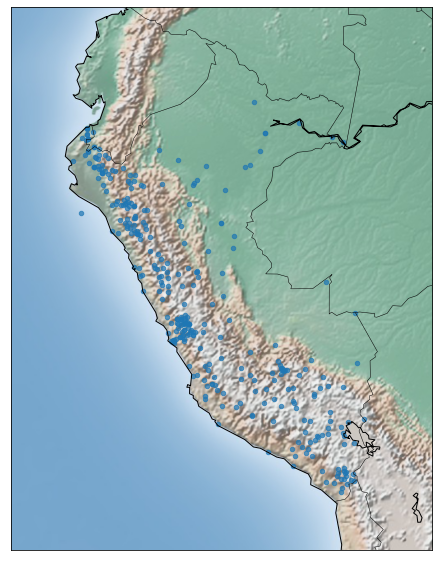

In [24]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Crear figura con tamaño personalizado
plt.figure(figsize=(10, 10))

# Crear el mapa del Perú
mapa = Basemap(llcrnrlon=-83.54, llcrnrlat=-20.22, urcrnrlon=-66.45, urcrnrlat=1.38, resolution='l', projection='merc')

# Dibujar la costa
mapa.drawcoastlines()

# Dibujar los límites de los países
mapa.drawcountries()


# Dibujar puntos en el mapa con tamaño reducido y colores asignados
mapa.scatter(df2['LON'], df2['LAT'], s=20, marker='o', alpha=0.7, label='Puntos', latlon=True)

# Ajustar el tamaño del mapa
#plt.xlim(-90, -60)
#plt.ylim(-25, 5)

# Añadir sombreado de relieve
mapa.shadedrelief(alpha=0.5)

# Mostrar el mapa
plt.show()


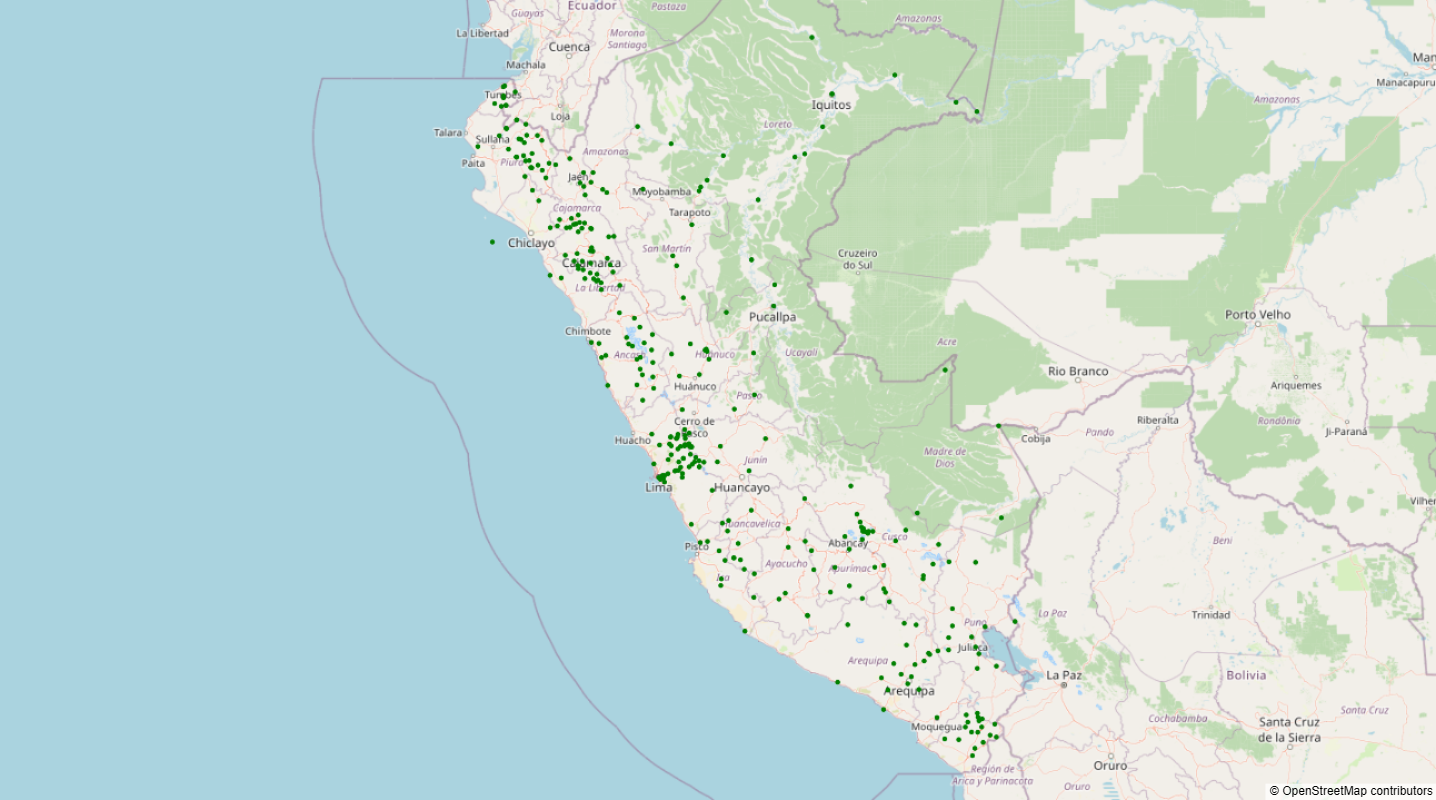

In [23]:
dfComp = dfComp.groupby(['CODIGO']).mean(['PRECIPITACION'])[['PRECIPITACION']]
df_grafico = plotMapPrecip(dfComp,size='') #PRECIPITACION

### Used Data : Mean precipitation (size)

In [ ]:
df_grafico['PRECIPITACION'].max(), df_grafico['PRECIPITACION'].min()

In [ ]:
dfComp = dfComp.groupby(['CODIGO']).mean(['PRECIPITACION'])[['PRECIPITACION']]
df_grafico = plotMapPrecip(dfComp,size='PRECIPITACION', )

### FULL Data : cantidad (size) - Color (used)

In [ ]:
df_grafico['PRECIPITACION'].max(), df_grafico['PRECIPITACION'].min()

In [ ]:
_df_total_grafico = _df_total.groupby(['CODIGO']).count()[['PRECIPITACION']]
_df_total_grafico['Used Stations'] = _df_total_grafico.index.isin(dfComp.index)

df_grafico = plotMapPrecip(_df_total_grafico,size='PRECIPITACION', color = 'Used Stations')

### FULL Data : Mean precipitation (size) - Color (used)

In [ ]:
_df_total_grafico = _df_total.groupby(['CODIGO']).mean(['PRECIPITACION'])[['PRECIPITACION']]
_df_total_grafico['Used Stations'] = _df_total_grafico.index.isin(dfComp.index)

df_grafico = plotMapPrecip(_df_total_grafico,size='PRECIPITACION', color = 'Used Stations')

# Verficamos las dimensiones de las imagenes satelitels

In [ ]:
dfPret.shape , _df_total.shape

In [ ]:
dfPret['CODIGO'].nunique() , _df_total['CODIGO'].nunique()

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf

img_path = path_imagenes+'PNG'
dir_list = [f'{img_path}/{x}' for x in os.listdir(img_path)]

In [ ]:
stats = {
    'max' : [],
    'min' : [],
    'mean' :[],
    'std'  : [],
}

for dir_base in []: #dir_list:
    imgs = os.listdir(dir_base)
    for img_file in imgs:
        image_string = tf.io.read_file(dir_base+ '/'+img_file)
        img_decoded = tf.io.decode_png(image_string, dtype=tf.uint16, channels=3)
        stats['max'].append(img_decoded.numpy().max())
        stats['min'].append(img_decoded.numpy().min())
        stats['mean'].append(img_decoded.numpy().mean())
        stats['std'].append(img_decoded.numpy().std())       